<a href="https://colab.research.google.com/github/LeeJeaHyuk/colab-sync-practice/blob/main/%EA%B8%B0%EB%A7%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2016251056 이재혁 기말 프로젝트

In [14]:
!pip install pyupbit
!pip install -U finance-datareader
import pandas as pd
import matplotlib as mpl
import numpy as np
import pyupbit
import FinanceDataReader as fdr
from matplotlib import pyplot as plt

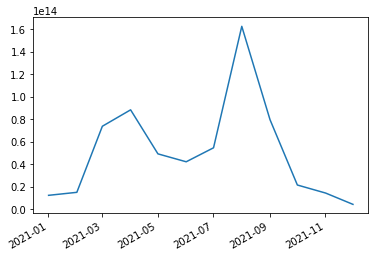

In [3]:
tickers = pyupbit.get_tickers(fiat='KRW')
for i in range(len(tickers)):
    ohlcv_tem=pyupbit.get_ohlcv(tickers[i], interval='month',count=12)
    ohlcv_tem=ohlcv_tem.drop(ohlcv_tem.columns[[0,1,2,3,5]],axis=1)
    ohlcv_tem.rename(columns={'volume': tickers[i]},inplace=True)
    if i==0:
      ohlcv=ohlcv_tem
    else:
      ohlcv=pd.concat([ohlcv,ohlcv_tem],axis=1)

pd.options.display.float_format = '{:.5f}'.format
volum_sum=ohlcv.sum(axis=1)
volum_sum.plot()

In [4]:
df_code=pd.DataFrame({'code':['005930','005935','001440','004980','009540','034020','005380',
   '090350','000660','033530','010140','005070','028260','018470',
   '000220','066570','000720','006390','019170','015760','003670',
   '007460','007660','006360','011200','005010','004985','025560',
   '034220','020150','003060','009150','042670','009415','088980',
   '036460','042660','088350','093370','097955','017550','028050',
   '019175','000020','035420','012330','034830','008970','004250','038380']})

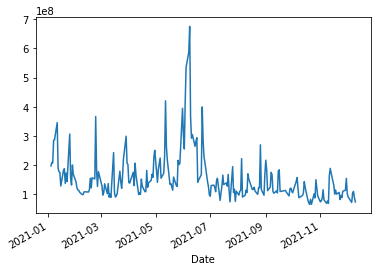

In [12]:
for i in range(len(df_code)-1): 
    vol_tem = fdr.DataReader(df_code.iloc[i,0],'2021')
    vol_tem=vol_tem.drop(vol_tem.columns[[0,1,2,3,5]],axis=1)
    if i==0:
      vol=vol_tem
    else:
      vol=pd.concat([vol,vol_tem],axis=1)
vol_sum=vol.sum(axis=1)
vol_sum.plot()

<BarContainer object of 234 artists>

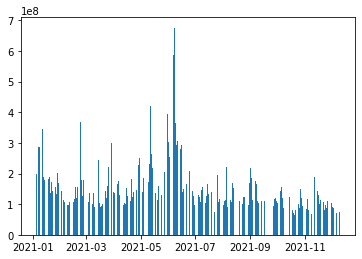

In [15]:
plt.bar((vol_sum.index),vol_sum)

<BarContainer object of 12 artists>

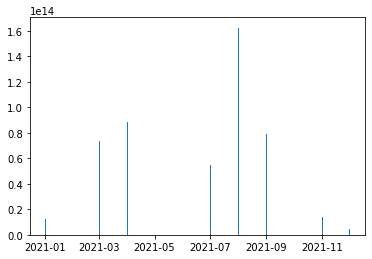

In [16]:
plt.bar((volum_sum.index),volum_sum)

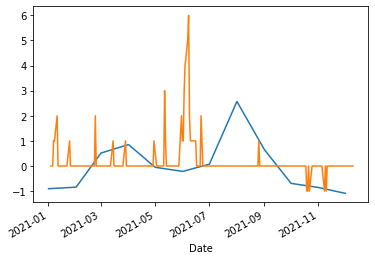

In [17]:
import scipy.stats as ss

tem_volum_sum = ss.zscore(volum_sum)
for i in range(len(volum_sum)):
    volum_sum[i]=tem_volum_sum[i]


tem_vol_sum = ss.zscore(vol_sum)
for i in range(len(vol_sum)):
    vol_sum[i]=tem_vol_sum[i]

volum_sum.plot()
vol_sum.plot()